In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
from threadpoolctl import threadpool_limits

# Limit the number of threads to 1 to avoid memory leak
threadpool_limits(1)

In [3]:
# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

In [4]:
# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [5]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

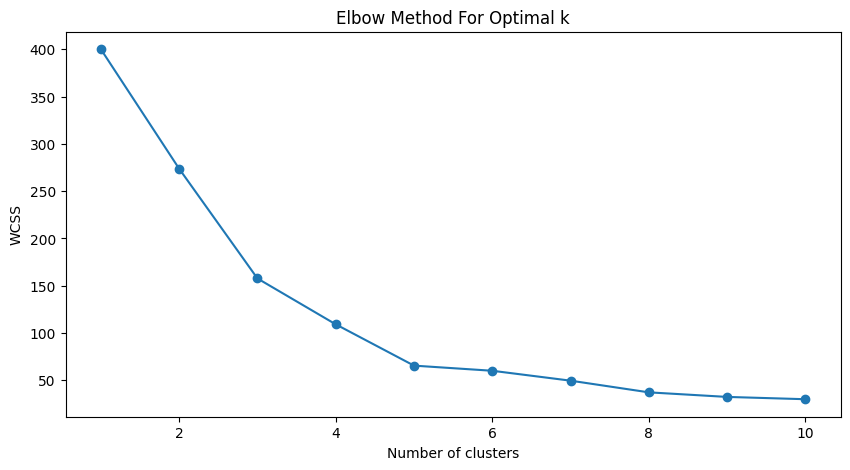

In [7]:
# Plot the elbow graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
# Apply K-means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [9]:
# Add the cluster labels to the original dataframe
df['Cluster'] = clusters

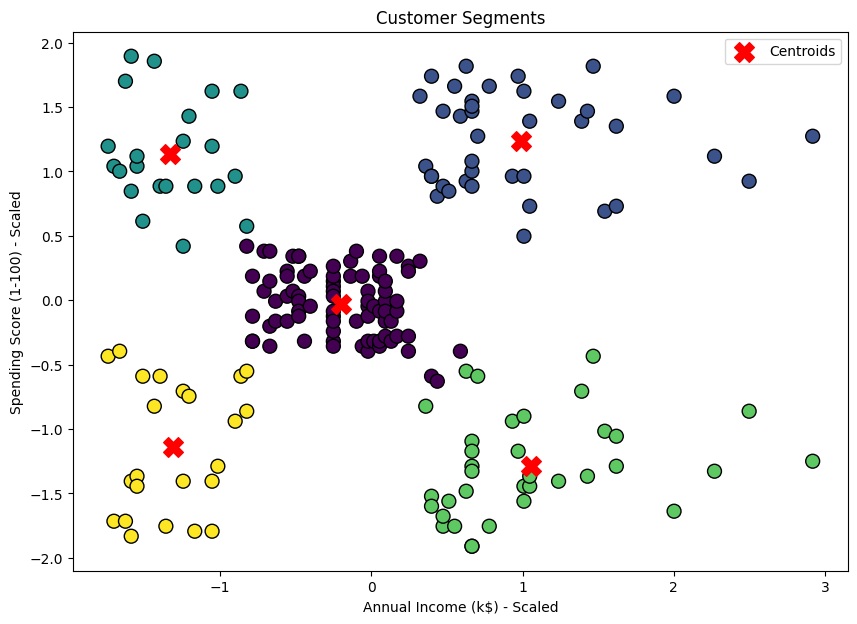

In [10]:
# Plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$) - Scaled')
plt.ylabel('Spending Score (1-100) - Scaled')
plt.legend()
plt.show()